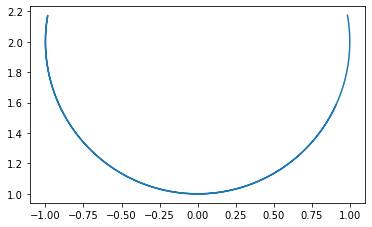

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import math

MODEL_DT = 0.001
g = 9.81

#-------------------------------------
class Body:
    def __init__(self, alpha, L):
        self.alpha = alpha * math.pi/180
        self.L = L
        self.s = self.alpha * self.L
        self.V = 0
        self.trajectory = []
        self.trajectory_x = []
        self.trajectory_y = []
        
        
    def advance(self):
        self.trajectory.append(self.s)
        
        self.s += self.V * MODEL_DT
        self.alpha = self.s/self.L
        self.a = -g * np.sin(self.alpha)
        self.V += self.a * MODEL_DT

        
#-------------------------------------
ball = Body(100,2)

for t in np.r_[0:3:MODEL_DT]:
    ball.advance()

for i in ball.trajectory:
    ball.trajectory_x.append(np.sin(i/ball.L))
    ball.trajectory_y.append(ball.L - np.cos(i/ball.L))

ax = plt.axes()
ax.set_aspect('equal')
plt.plot(ball.trajectory_x, ball.trajectory_y)
plt.show()


    
#Сделать  https://sodocumentation.net/ru/matplotlib/topic/6983/%D0%B0%D0%BD%D0%B8%D0%BC%D0%B0%D1%86%D0%B8%D1%8F-%D0%B8-%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9-%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA

        

        
       
    
        
        
        